In [1]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = 'monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [2]:
# Filter the dataset to include records only up to 2020
filtered_data = data[data['JAHR'] <= 2020]

# Drop unnecessary columns for clarity
filtered_data = filtered_data[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]

# Display the filtered data's structure
filtered_data.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0


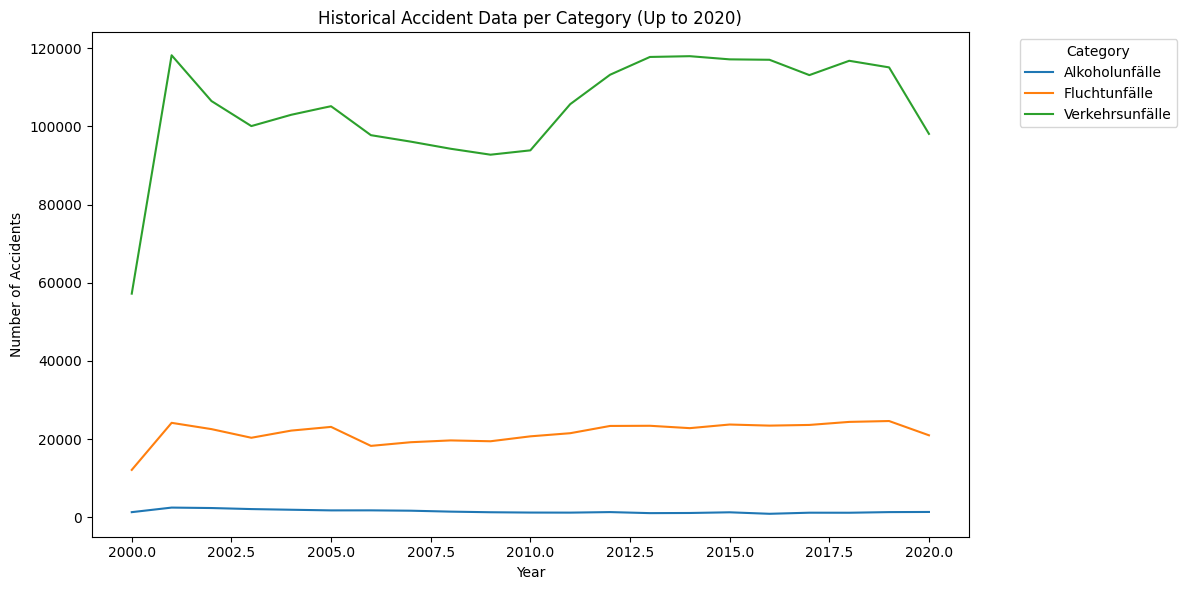

In [3]:
import matplotlib.pyplot as plt

# Filter for visualization: group by category and sum values per year
historical_data = (
    filtered_data.groupby(['MONATSZAHL', 'JAHR'])
    .sum(numeric_only=True)['WERT']
    .unstack(level=0)
)

# Plot the historical data
plt.figure(figsize=(12, 6))
historical_data.plot(ax=plt.gca())
plt.title("Historical Accident Data per Category (Up to 2020)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


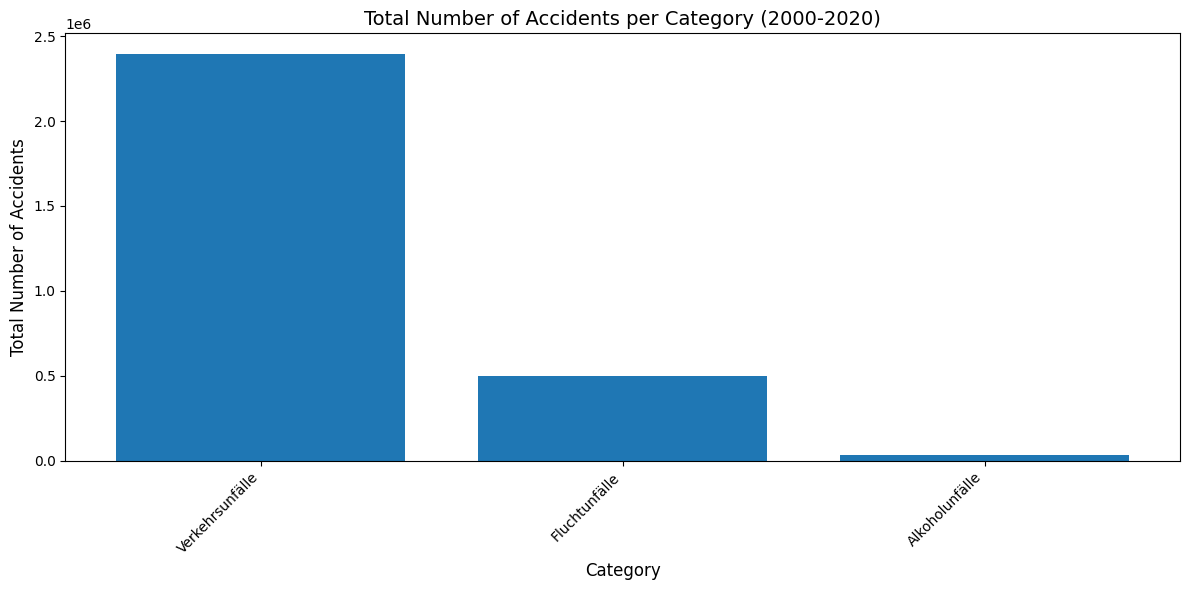

In [4]:
# Aggregate data to calculate total accidents per category (MONATSZAHL)
category_data = data.groupby('MONATSZAHL')['WERT'].sum().reset_index()

# Rename columns for clarity
category_data.columns = ['Category', 'Total_Accidents']

# Sort categories by the total number of accidents
category_data = category_data.sort_values(by='Total_Accidents', ascending=False)

# Plot total accidents vs category
plt.figure(figsize=(12, 6))
plt.bar(category_data['Category'], category_data['Total_Accidents'])
plt.title('Total Number of Accidents per Category (2000-2020)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
